# <span style="color:red"> Numerical Simulation Laboratory </span>
## <span style="color:orange">  Numerical exercises 4: Samuele Voltan's notebook.</span>

In [1]:
# LIBRARIES
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.constants

In [2]:
# FUNCTIONS
def error(AV, AV2, n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2 - AV*AV)/n)

def block_method(data): # Function for blocking method data analysis
    sum_prog = 0.
    sum2_prog = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        AV = sum_prog / (i+1)
        AV2 = sum2_prog / (i+1)
        y[i,0] = AV
        y[i,1] = error(AV, AV2, i)
    return y

In [3]:
# DATA FILES
data1 = np.loadtxt("data/lab04/ex04.1/measure.out")
scale = np.loadtxt("data/lab04/ex04.1/scale_factors.out")
data3 = np.loadtxt("data/lab04/ex04.3/block_measure.out")
data4 = np.loadtxt("data/lab04/ex04.3/gas.out")

### <span style="color:red"> Exercise 04.1

Improve the MD code by enabling the possibility to (re)start reading not only a *actual* spatial configuration $\vec{r}(t)$ file but also an *old* spatial configuration $\vec{r}(t-dt)$ file. Moreover, add the possibility to rescale the velocities (i.e. to correct $\vec{r}(t-dt)$) in order to match a desired temperature.

### <span style="color:orange">Solution
Below I show the equilibration process for a **solid** with desired temperature $T=0.8$ along with the scale factors computed at the restart of the simulation. We can see the progress in rescaling the velocities (therefore, the temperature). In this conditions, We can see that 4 steps of equilibration are sufficient, since the last scale factor is very close to 1.

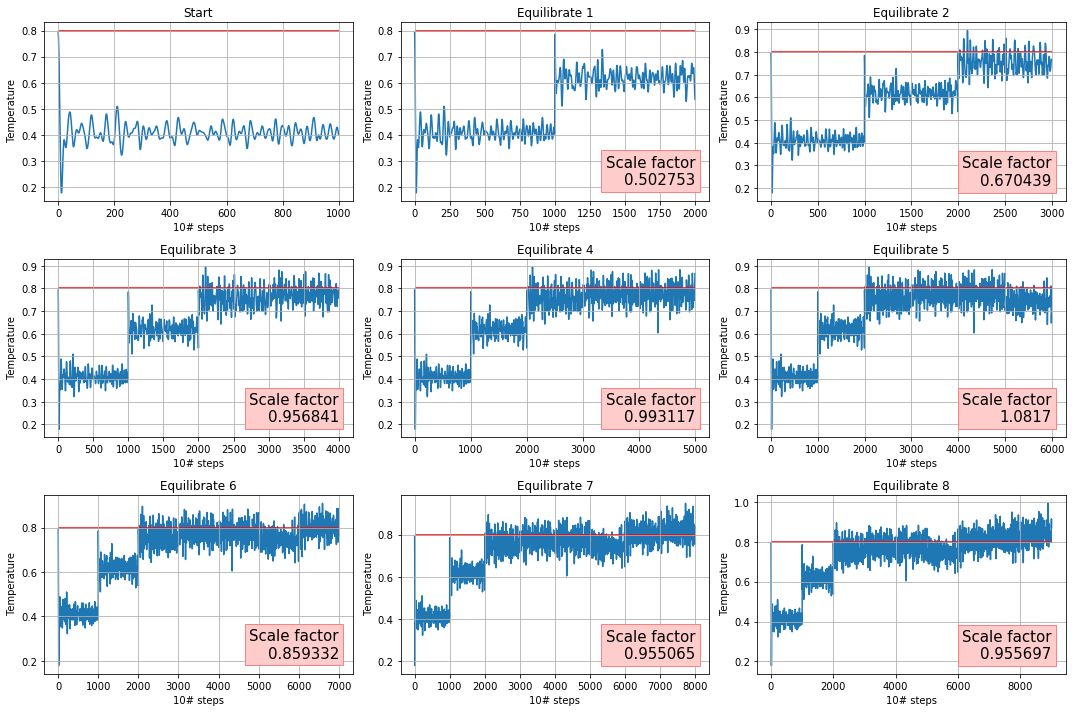

In [4]:
title = ["Start", "Equilibrate 1", "Equilibrate 2", "Equilibrate 3", "Equilibrate 4", "Equilibrate 5", "Equilibrate 6", "Equilibrate 7", "Equilibrate 8"]
plt.figure(figsize=(15,10))
for i in range(9) :
    plt.subplot(3, 3, i+1)
    plt.title(title[i])
    plt.plot(data1[0:1000 * (i+1),2], zorder = 0)
    plt.hlines(0.8, 0, 1000 * (i+1), colors = 'r', linestyles = 'solid', zorder = 1)
    plt.xlabel(r"10# steps")
    plt.ylabel(r" Temperature")
    if i != 0 :
        plt.text(1000 * (i+1), 0.2, r'Scale factor'+'\n'+str(scale[i - 1]), size = 15,
             ha="right", va="bottom",
             bbox=dict(boxstyle="square",
                    ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
             )  
    plt.tight_layout()
    plt.grid(True)
plt.plot();

Below I show the other variables, namely the total energy $E$, the kinectic energy $T$ and the potential energy $V$, after **8 equilibrations and 1 measurement**.

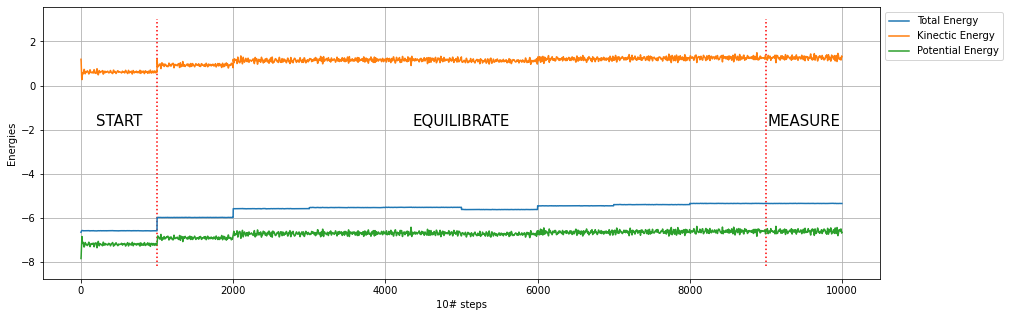

In [5]:
plt.figure(figsize=(15,5))
plt.plot(data1[:,3], label = 'Total Energy')
plt.plot(data1[:,1], label = 'Kinectic Energy')
plt.plot(data1[:,0], label = 'Potential Energy')
# plt.vlines(0, -8.2, 3, colors = 'r', linestyles = 'dotted') #comment to see the first jump of the energies at start
plt.vlines(1000, -8.2, 3, colors = 'r', linestyles = 'dotted')
plt.vlines(9000, -8.2, 3, colors = 'r', linestyles = 'dotted')
plt.text(500, -1.6, "START", size = 15, ha = "center", va = "center")  
plt.text(5000, -1.6, "EQUILIBRATE", size = 15, ha = "center", va = "center")  
plt.text(9500, -1.6, "MEASURE", size = 15, ha = "center", va = "center")  
plt.xlabel(r"10# steps")
plt.ylabel(r"Energies")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.plot();

Exercise 04.2 required to update che NVE code to include data blocking. Since this feature is put to use in Exercise 04.3, I shall not show any picture here.

### <span style="color:red"> Exercise 04.3

By means of your upgraded MD code, equilibrate and perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

### <span style="color:orange">Solution
I performed the simulation with <code>N_blocks = 100</code> blocks of <code>N_throws = 10000</code> throws each and the code produced the file <code>block_measure.out</code>. Here I show the estimations.

In [6]:
# SOME DEFINITIONS
epsilonk = 120.
epsilon = epsilonk * scipy.constants.k
factor = [epsilon, epsilon, epsilonk, epsilon]
title = ["Potential Energy [Joule]", "Kinectic Energy [Joule]", "Temperature [Kelvin]", "Total Energy [Joule]"]
x = np.arange(100)

Potential Energy [Joule] = -1.1004e-20 ± 2.2885e-25
Kinectic Energy [Joule] = 2.0235e-21 ± 2.2065e-25
Temperature [Kelvin] = 9.7707e+01 ± 1.0655e-02
Total Energy [Joule] = -8.9807e-21 ± 4.5333e-26


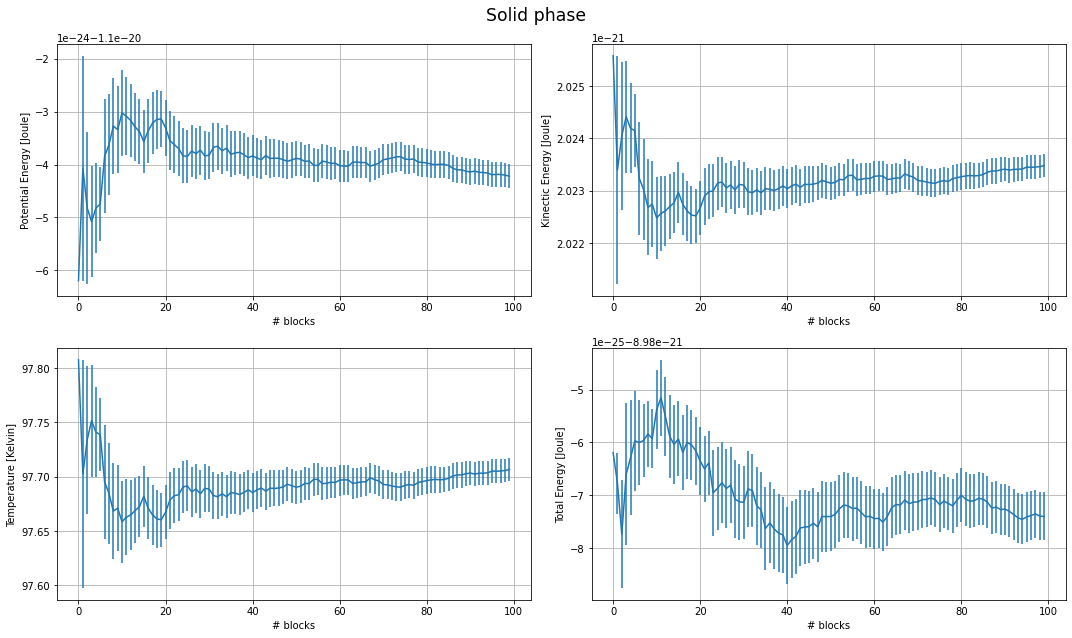

In [7]:
plt.figure(figsize=(15,9))
plt.suptitle("Solid phase", fontsize = "xx-large")
for i in range(4) :
    plt.subplot(2, 2, i+1)
    y = block_method(data3[0:100, i]) * factor[i]
    plt.errorbar(x,y[:,0], yerr=y[:,1])
    plt.xlabel(r"# blocks")
    plt.ylabel(title[i])
    plt.tight_layout()
    plt.grid(True)
    print(title[i] + f" = {y[-1, 0]:.4e} ± {y[-1, 1]:.4e}")
plt.plot();

Potential Energy [Joule] = -8.2877e-21 ± 1.7545e-24
Kinectic Energy [Joule] = 2.7884e-21 ± 1.6945e-24
Temperature [Kelvin] = 1.3464e+02 ± 8.1823e-02
Total Energy [Joule] = -5.4993e-21 ± 1.0596e-25


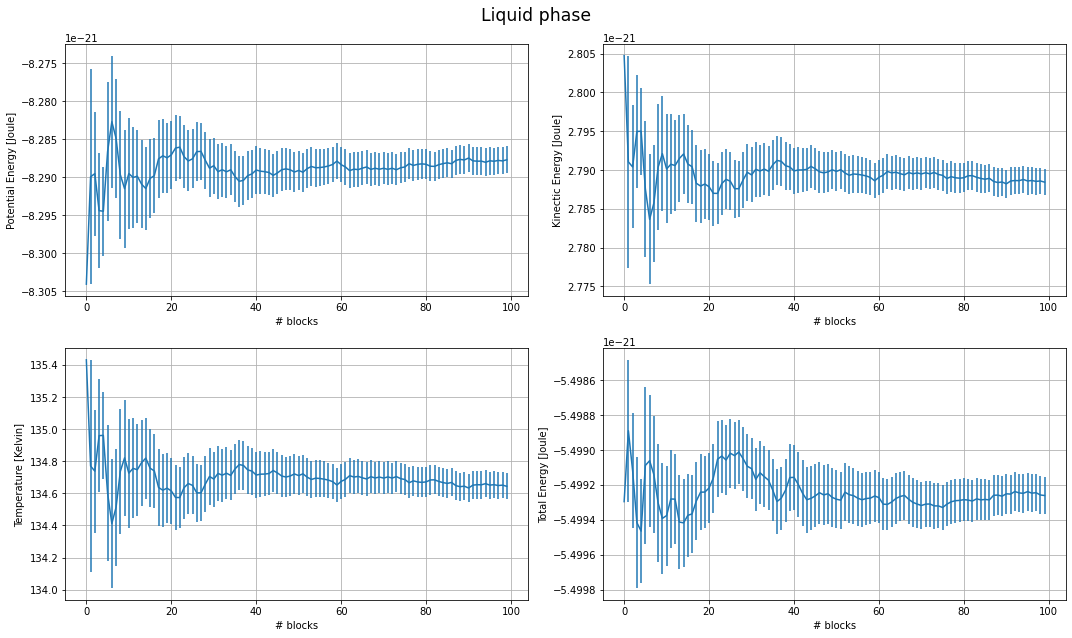

In [8]:
plt.figure(figsize=(15,9))
plt.suptitle("Liquid phase", fontsize = "xx-large")
for i in range(4) :
    plt.subplot(2, 2, i+1)
    y = block_method(data3[100:200,i]) * factor[i]
    plt.errorbar(x,y[:,0], yerr=y[:,1])
    plt.xlabel(r"# blocks")
    plt.ylabel(title[i])
    plt.tight_layout()
    plt.grid(True)
    print(title[i] + f" = {y[-1, 0]:.4e} ± {y[-1, 1]:.4e}")
plt.plot();

Potential Energy [Joule] = -6.5451e-22 ± 4.4824e-24
Kinectic Energy [Joule] = 3.1633e-21 ± 4.4777e-24
Temperature [Kelvin] = 1.5275e+02 ± 2.1621e-01
Total Energy [Joule] = 2.5088e-21 ± 1.1728e-26


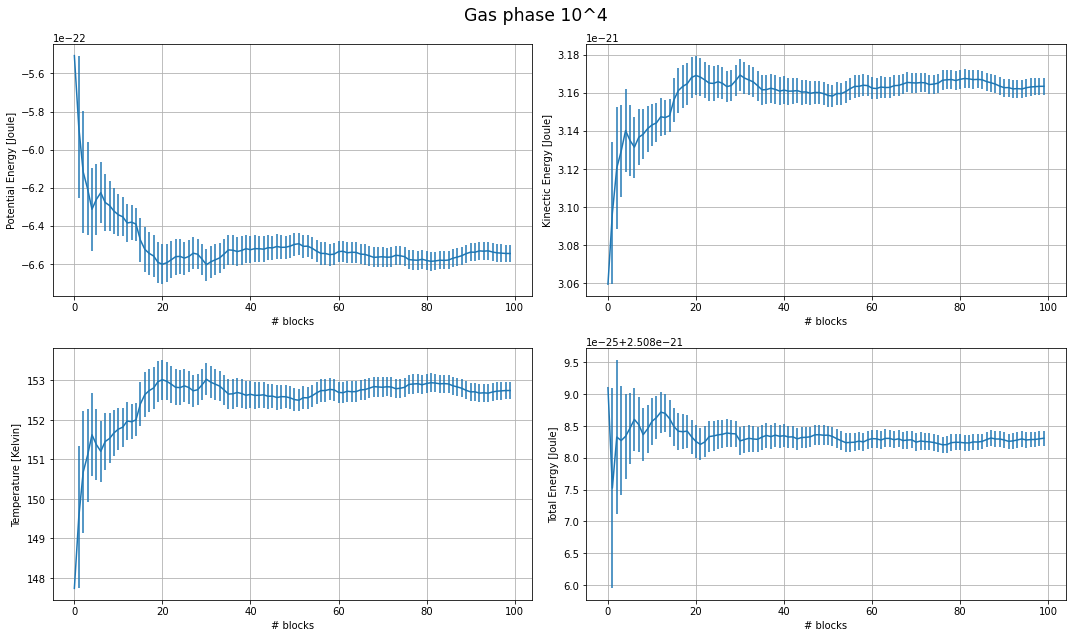

In [9]:
plt.figure(figsize=(15,9))
plt.suptitle("Gas phase 10^4", fontsize = "xx-large")
for i in range(4) :
    plt.subplot(2, 2, i+1)
    y = block_method(data3[200:300,i]) * factor[i]
    plt.errorbar(x,y[:,0], yerr=y[:,1])
    plt.xlabel(r"# blocks")
    plt.ylabel(title[i])
    plt.tight_layout()
    plt.grid(True)
    print(title[i] + f" = {y[-1, 0]:.4e} ± {y[-1, 1]:.4e}")
plt.plot();

The **gas phase** estimations may need a bigger number of throws per block, since the trend of the error bars seems way too optimistic. I performed the simulation for the gas phase also with <code>N_throws = 10000</code> throws per block and the code produced the file <code>gas5.out</code>. Here I show the estimations.

Potential Energy [Joule] = -6.6589e-22 ± 1.8472e-24
Kinectic Energy [Joule] = 3.0480e-21 ± 1.8452e-24
Temperature [Kelvin] = 1.4718e+02 ± 8.9094e-02
Total Energy [Joule] = 2.3821e-21 ± 4.6216e-27


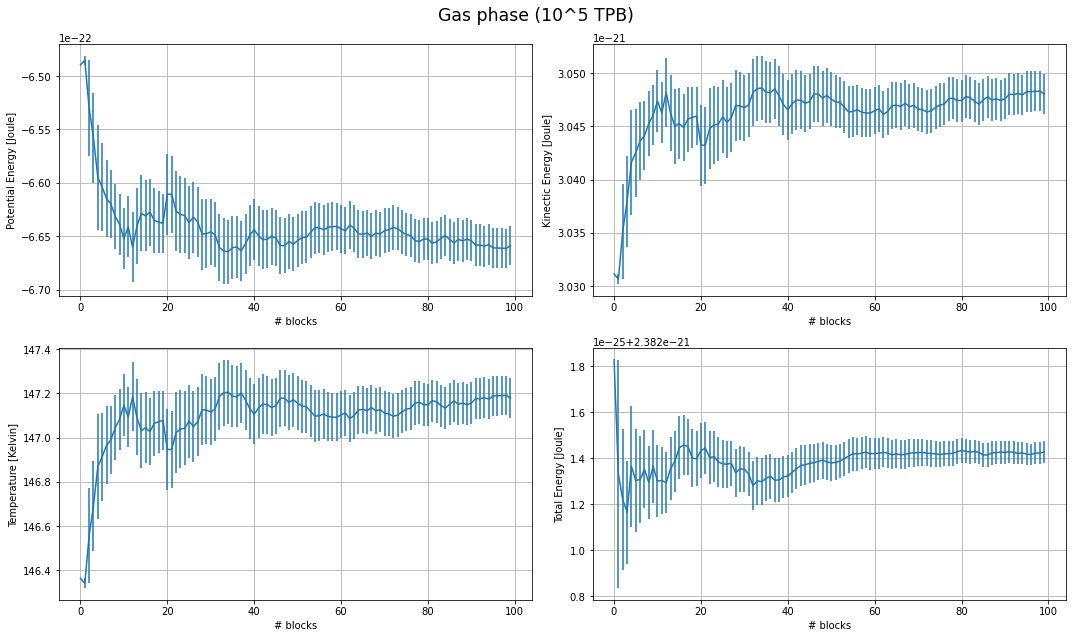

In [10]:
plt.figure(figsize=(15,9))
plt.suptitle("Gas phase (10^5 TPB)", fontsize = "xx-large")
for i in range(4) :
    plt.subplot(2, 2, i+1)
    y = block_method(data4[:,i]) * factor[i]
    plt.errorbar(x,y[:,0], yerr=y[:,1])
    plt.xlabel(r"# blocks")
    plt.ylabel(title[i])
    plt.tight_layout()
    plt.grid(True)
    print(title[i] + f" = {y[-1, 0]:.4e} ± {y[-1, 1]:.4e}")
plt.plot();